<h1>NSW HSC Analytics (2004-2017)</h1>

In this project, we aim to look at some statistics from the <i>Higher School Certificate</i> HSC up until 2017. We seek to observe at the general trend in the completion of the HSC from 2004 to 2017 and look at the trend in course enrollment for particular subjects, with a particular focus on STEM subjects. Specifically, the subjects to be investigated in full detail are:

- Mathematics (Advanced, Extension 1 and Extension 2)
- Chemistry
- Physics
- Biology

As the project progresses, other STEM-based subjects will also be analysed in the same fashion as those above. For each section in the notebook, classical machine learning techniques are used to form predictions regarding general and course enrollment in the near future. The datasets can be found in the links below:

- <b>NSW government school HSC completions (2007-2017)</b><br>
https://data.cese.nsw.gov.au/data/dataset/nsw-government-school-hsc-completions
- <b>Course enrolments in Years 11 and 12 subjects in NSW government schools (2012-2017)</b><br>
https://data.cese.nsw.gov.au/data/dataset/course-enrolments-in-year-11-and-year-12-subjects-in-nsw-government-schools

In [53]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing some necessary machine learning libraries (may or may not use)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


<h2>Importing Datasets & Data Cleaning</h2>

In [54]:
# Importing data for NSW HSC completion from 2004-2017:
hsc_comp = pd.read_csv("2004_2017_hsc_complete.csv")
hsc_comp

,year,HSC_record_of_achievement_all_students,HSC_record_of_achievement_aboriginal_students,HSC_award_all_students,HSC_award_aboriginal_students
0,2004,38883,573,36660,528
1,2005,38175,626,35917,574
2,2006,37739,646,35460,603
3,2007,38275,736,35854,674
4,2008,38815,824,36468,755
5,2009,39164,906,36465,815
6,2010,41347,991,38181,862
7,2011,41987,1082,38661,919
8,2012,42452,1242,38774,1061
9,2013,43694,1381,38908,1150


If we consider the <i>record of achievement of all students</i> over the course of the years between 2004-2017, we should see an overall increase in the number of students who have completed the HSC. This is shown in the graph below:

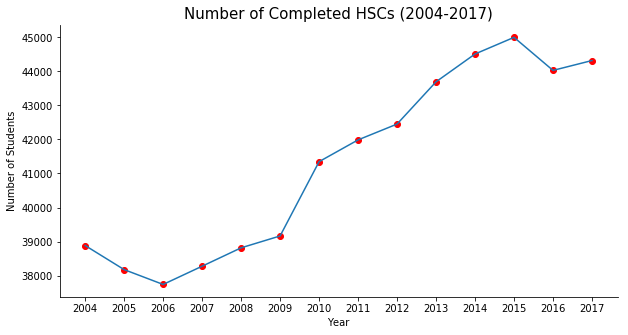

In [55]:
# Apply inline magic
%matplotlib inline

# Plot the record of achievement (all students) against the year:
x = hsc_comp['year']
y = hsc_comp['HSC_record_of_achievement_all_students']

# Instantiate a figure:
fig, ax = plt.subplots(figsize=(10,5))

# Plot the make adjustents to the figure:
ax.set_title("Number of Completed HSCs (2004-2017)", fontsize=15)
ax.set_ylabel("Number of Students")
ax.set_xlabel("Year")
ax.scatter(x,y, color='red')
ax.plot(x,y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(list(x))

# Show final figure
plt.show()

As expected, the number of students who have completed the HSC has steadily increased from 2004 to 2017. We note a few notable trends in the graph:

- The number of completed HSCs showed a gradual decrease from 2004 (with 38883 students) to 2006 (with 37739 students) but increased thereafter.
- There is a slight drop in HSC completions in 2016 (44029 students) compared to that in 2015 (45000 students) which steadily increased once again to 44319 students in 2017. 
- The graph shows a steep increase in HSC completion from 2009 to 2010. During this year, we note that the <i>then</i> BOSTES transitioned to online marking for majority of subjects. The internet was utilised not only for providing a repository of past exam papers for students but using the website for HSC <i>Questions of The Day</i> which would have led to an increase in student engagement. More discussion in retrospect was outlined in the following link: https://www.boardofstudies.nsw.edu.au/bos_stats/hsc-review-2010.html

Though not exactly linear, a line of best fit can be approximated to provide the best possible estimation of the trend in HSC completion that could be projected to the near future. This is performed in the following code cell:

In [56]:
# Instantiate an empty linear regression model:
model = LinearRegression()

# Reshape x and y to be 2D arrays:
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

# Fit data to model:
model.fit(x,y)

# Obtain coefficient and intercept:
m = model.coef_
b = model.intercept_

# Create the line of best fit to plot along with the original graph:
y_model = m*x + b

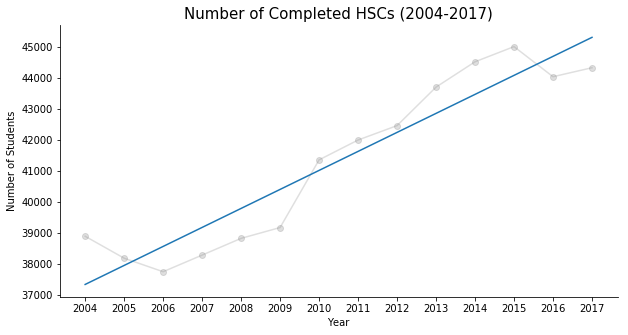

In [57]:
# Instantiate a figure:
fig, ax = plt.subplots(figsize=(10,5))

# Plot the make adjustents to the figure:
ax.set_title("Number of Completed HSCs (2004-2017)", fontsize=15)
ax.set_ylabel("Number of Students")
ax.set_xlabel("Year")
ax.scatter(x,y, color='grey', alpha=0.25)
ax.plot(x,y, color='grey', alpha=0.25)
ax.plot(x,y_model)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(list(x))

# Show final figure
plt.show()

We can predict the number of completed HSCs in 2018 and 2019 using the linear regression model shown above. Let's see what the predictions yield.

In [58]:
# 2018 prediction:
pred_2018 = int(model.predict([[2018]]).flatten())

# 2019 prediction:
pred_2019 = int(model.predict([[2019]]).flatten())

# Create a convenient print out:
print("Number of completed HSCs in 2018 = {}".format(pred_2018))
print("Number of completed HSCs in 2019 = {}".format(pred_2019))

Number of completed HSCs in 2018 = 45911
Number of completed HSCs in 2019 = 46524


<h1>Trends In HSC STEM Course Enrolments</h1>

In this section, we aim to investigate the trends in the student enrolment in STEM HSC courses from 2012-2017. Our initial expectation is an increase in the number of students in STEM courses as the years progress similar to that shown by the number of completed HSCs since 2004. Furthermore, we investigate the retention rate of students in these STEM subjects for each 2 year period (e.g. 2011-2012) for a particular cohort of students. Hopefully, from this, we can gain an insight into the growth in popularity of the maths and sciences in the HSC. We begin the analysis in the code cell below.

In [59]:
# Begin by importing all relevant datasets. We can use the glob module to assist us:
import glob

# Within the same file, look for all "...en.csv" files. Output is a list:
enrol_datasets = glob.glob("*enrol.csv")

# Check if list is fine:
enrol_datasets

['2012_y11_and_12_enrol.csv',
 '2013_y11_and_12_enrol.csv',
 '2014_y11_and_12_enrol.csv',
 '2015_y11_and_12_enrol.csv',
 '2016_y11_and_12_enrol.csv',
 '2017_y11_and_12_enrol.csv']

We use pandas to load the first dataset (2012 enrolment) into the workspace. From here, we perform SQL-like merges with all other datasets onto the 2012 enrolment dataset. The procedure is performed in the code cell below.

In [60]:
# Load the first (2012) dataset (index 0). Assign resultant dataframe to a variable named 'df':
df_temp = pd.read_csv(enrol_datasets[0])
df_temp.head(10)

,course_name,units,year_11_male,year_11_female,year_11_total,year_12 _male,year_12 _female,year_12 _total,Unnamed: 8
0,Aboriginal Studies,2,170.0,347.0,517.0,93.0,227.0,320.0,NaN
1,Aboriginal Studies Life Skills,2,28.0,15.0,43.0,NaN,NaN,NaN,NaN
2,Aged Care Specialisation Study,1,NaN,NaN,NaN,4.0,16.0,20.0,NaN
3,Agriculture,2,784.0,677.0,1461.0,444.0,544.0,988.0,NaN
4,Agriculture Life Skills,2,30.0,13.0,43.0,23.0,9.0,32.0,NaN
5,Ancient History,2,3982.0,5531.0,9513.0,2953.0,4343.0,7296.0,NaN
6,Arabic Beginners,2,2.0,1.0,3.0,NaN,3.0,3.0,NaN
7,Arabic Continuers,2,55.0,101.0,156.0,69.0,96.0,165.0,NaN
8,Arabic Extension,1,NaN,NaN,NaN,23.0,32.0,55.0,NaN
9,Armenian Continuers,2,NaN,4.0,4.0,1.0,5.0,6.0,NaN


In [61]:
# Print out number of rows and columns for 2012 dataset:
print(df_temp.shape)

(185, 9)


So there are 185 HSC courses of which we need to pull out the main STEM subjects from. At the moment there is no guarantee that there are duplicates of courses in the dataframes. So perhaps it would be good to check for duplicates in general before proceeding.

In [62]:
df_temp_dupl = df_temp[df_temp.duplicated()]
df_temp_dupl

,course_name,units,year_11_male,year_11_female,year_11_total,year_12 _male,year_12 _female,year_12 _total,Unnamed: 8


From the above there seems to be none! Again no guarantee for all other datasets but this means we can safely extract the relevant subjects without needing to worry about dealing with duplicates. The last step is to see how the STEM subjects are named in the dataset.

In [63]:
temp_bool = df_temp['course_name'].str.contains("Mathematics|Chemistry|Physics|Biology")
df_temp_stem = df_temp[temp_bool].reset_index(drop=True)
df_temp_stem

,course_name,units,year_11_male,year_11_female,year_11_total,year_12 _male,year_12 _female,year_12 _total,Unnamed: 8
0,Biology,2,5018.0,8218.0,13236.0,3545.0,5882.0,9427.0,NaN
1,Chemistry,2,4996.0,4353.0,9349.0,3585.0,2884.0,6469.0,NaN
2,General Mathematics,2,10528.0,11043.0,21571.0,8942.0,9303.0,18245.0,NaN
3,Mathematics,2,7647.0,6591.0,14238.0,4816.0,4152.0,8968.0,NaN
4,Mathematics Extension,1,3967.0,3110.0,7077.0,NaN,NaN,NaN,NaN
5,Mathematics Extension 1,2,NaN,NaN,NaN,2985.0,2153.0,5138.0,NaN
6,Mathematics Extension 2,2,NaN,NaN,NaN,1310.0,812.0,2122.0,NaN
7,Mathematics Life Skills,2,900.0,494.0,1394.0,617.0,369.0,986.0,NaN
8,Physics,2,5843.0,1857.0,7700.0,4354.0,1258.0,5612.0,NaN


The physics, chemistry and biology are fine as they are. However there appears to be a clear distinction between "Mathematics Extension" and "Mathematics Extension 1" where the latter is a 2-unit course instead of a 1-unit course and the cohort count is only applicable to Year 12 (whiile the Mathematics Extension variant is only Year 11 applicable). This suggests that the subjects are nevertheless the same but one is the HSC variant. For the purposes of this project, it should be safe to combine the rows. We can do this in the following way:

In [64]:
tmp = df_temp_stem.iloc[[4,5], :]
tmp1 = tmp[tmp['course_name'] == "Mathematics Extension"].fillna(0).reset_index(drop=True)
tmp2 = tmp[tmp['course_name'] == "Mathematics Extension 1"].fillna(0).reset_index(drop=True)

In [65]:
tmp3 = tmp1.copy()

In [66]:
for col in tmp1.columns:
    tmp3[col] = tmp1[col] + tmp2[col]

In [67]:
tmp3['course_name'] = tmp3['course_name'].str.replace('Mathematics ExtensionMathematics Extension 1', 'Extension Mathematics')

In [68]:
tmp3

,course_name,units,year_11_male,year_11_female,year_11_total,year_12 _male,year_12 _female,year_12 _total,Unnamed: 8
0,Extension Mathematics,3,3967.0,3110.0,7077.0,2985.0,2153.0,5138.0,0.0


In [69]:
df_temp_stem = pd.concat([df_temp_stem, tmp3], axis=0)
df_temp_stem = df_temp_stem.reset_index(drop=True)
df_temp_stem

,course_name,units,year_11_male,year_11_female,year_11_total,year_12 _male,year_12 _female,year_12 _total,Unnamed: 8
0,Biology,2,5018.0,8218.0,13236.0,3545.0,5882.0,9427.0,NaN
1,Chemistry,2,4996.0,4353.0,9349.0,3585.0,2884.0,6469.0,NaN
2,General Mathematics,2,10528.0,11043.0,21571.0,8942.0,9303.0,18245.0,NaN
3,Mathematics,2,7647.0,6591.0,14238.0,4816.0,4152.0,8968.0,NaN
4,Mathematics Extension,1,3967.0,3110.0,7077.0,NaN,NaN,NaN,NaN
5,Mathematics Extension 1,2,NaN,NaN,NaN,2985.0,2153.0,5138.0,NaN
6,Mathematics Extension 2,2,NaN,NaN,NaN,1310.0,812.0,2122.0,NaN
7,Mathematics Life Skills,2,900.0,494.0,1394.0,617.0,369.0,986.0,NaN
8,Physics,2,5843.0,1857.0,7700.0,4354.0,1258.0,5612.0,NaN
9,Extension Mathematics,3,3967.0,3110.0,7077.0,2985.0,2153.0,5138.0,0.0


We can now drop the original ```Mathematics Extension``` and ```Mathematics Extension 1``` rows since we have combined them. We should also drop the ```Unnamed: 8``` column while we are at it. We'll drop the ```Mathematics Life Skills``` row as we want an overview of the statistics for the mainstream STEM subjects that majority of students undertake. 

As for ```Mathematics Extension 2```, there are ```NaN``` values for the year 11 cohort sizes. This makes sense the course is exclusive to Year 12 students. We'll fill these entries with 0 so the row is easier to work with in the later stages of the project.

In [70]:
df_temp_stem = df_temp_stem.drop([4,5,7])
df_temp_stem = df_temp_stem.drop(columns=['Unnamed: 8'], axis=1)
df_temp_stem = df_temp_stem.fillna(0)

In [71]:
df_temp_stem

,course_name,units,year_11_male,year_11_female,year_11_total,year_12 _male,year_12 _female,year_12 _total
0,Biology,2,5018.0,8218.0,13236.0,3545.0,5882.0,9427.0
1,Chemistry,2,4996.0,4353.0,9349.0,3585.0,2884.0,6469.0
2,General Mathematics,2,10528.0,11043.0,21571.0,8942.0,9303.0,18245.0
3,Mathematics,2,7647.0,6591.0,14238.0,4816.0,4152.0,8968.0
6,Mathematics Extension 2,2,0.0,0.0,0.0,1310.0,812.0,2122.0
8,Physics,2,5843.0,1857.0,7700.0,4354.0,1258.0,5612.0
9,Extension Mathematics,3,3967.0,3110.0,7077.0,2985.0,2153.0,5138.0


We need to fix up the Year 12 column names before we proceed. There is a white space present between the ```2``` and the 2nd underscore character we should remove.

In [72]:
# Extract columns
cols = df_temp_stem.columns
new_cols = []

# Replace all white spaces in any of the column names with no space.
for col in cols:
    new_col = col.replace(" ", "")
    new_cols.append(new_col)

# Replace existing column names on the current dataframe:
df_temp_stem.columns = new_cols

# View the current dataframe with modified columns
df_temp_stem

,course_name,units,year_11_male,year_11_female,year_11_total,year_12_male,year_12_female,year_12_total
0,Biology,2,5018.0,8218.0,13236.0,3545.0,5882.0,9427.0
1,Chemistry,2,4996.0,4353.0,9349.0,3585.0,2884.0,6469.0
2,General Mathematics,2,10528.0,11043.0,21571.0,8942.0,9303.0,18245.0
3,Mathematics,2,7647.0,6591.0,14238.0,4816.0,4152.0,8968.0
6,Mathematics Extension 2,2,0.0,0.0,0.0,1310.0,812.0,2122.0
8,Physics,2,5843.0,1857.0,7700.0,4354.0,1258.0,5612.0
9,Extension Mathematics,3,3967.0,3110.0,7077.0,2985.0,2153.0,5138.0


We are ready to plot now! We should gain some perspective into the total number of students for each subject as well as the number of males and females in each of the courses. We begin with the mathematics courses.

In [73]:
math_courses = df_temp_stem[df_temp_stem['course_name'].str.contains("Mathematics")]
math_courses= math_courses.reset_index(drop=True)
math_courses

,course_name,units,year_11_male,year_11_female,year_11_total,year_12_male,year_12_female,year_12_total
0,General Mathematics,2,10528.0,11043.0,21571.0,8942.0,9303.0,18245.0
1,Mathematics,2,7647.0,6591.0,14238.0,4816.0,4152.0,8968.0
2,Mathematics Extension 2,2,0.0,0.0,0.0,1310.0,812.0,2122.0
3,Extension Mathematics,3,3967.0,3110.0,7077.0,2985.0,2153.0,5138.0


In [74]:
year_11_math = math_courses[['course_name', 'year_11_male', 'year_11_female']]
year_12_math = math_courses[['course_name', 'year_12_male', 'year_12_female']]

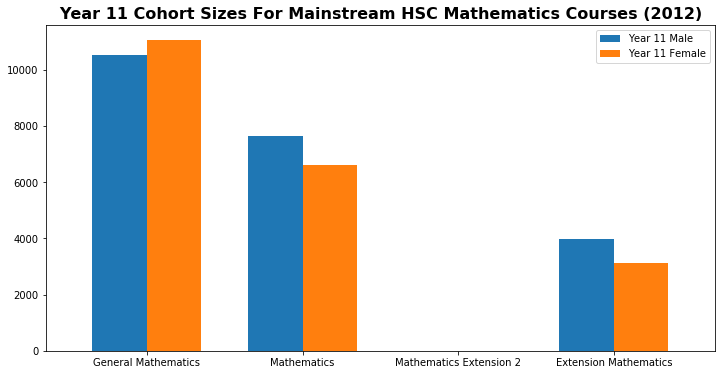

In [75]:
fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
ind = np.arange(4)
ax.bar(ind + (width/2), year_11_math['year_11_male'], width=width, label='Year 11 Male')
ax.bar(ind + (width + width/2), year_11_math['year_11_female'], width=width, label='Year 11 Female')
ax.set(xticks=ind + width, xticklabels=math_courses.course_name, xlim=[2*width - 1, len(math_courses)])
plt.title("Year 11 Cohort Sizes For Mainstream HSC Mathematics Courses (2012)", fontsize=16, fontweight='bold')
plt.legend()
plt.show()

Note that there are no students for Mathematics Extension 2 as the course is exclusive for Year 12 candidates. The course also requires Mathematics Extension 1 as a completed pre-requisite since the Extension 2 course is dependent on Extension 1.

We can see that for the calculus based courses (Mathematics, and Extension Mathematics), there are more male candidates than there are female. Whereas for General Mathematics, the trend is the opposite where there is slightly greater amount of female candidates than that of male students. The general trend for the last decade or so has been the male dominance in the calculus-based mathematics courses. 

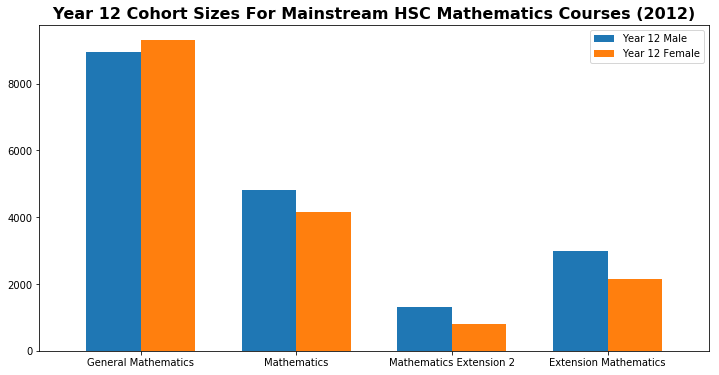

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
ind = np.arange(4)
ax.bar(ind + (width/2), year_12_math['year_12_male'], width=width, label='Year 12 Male')
ax.bar(ind + (width + width/2), year_12_math['year_12_female'], width=width, label='Year 12 Female')
ax.set(xticks=ind + width, xticklabels=math_courses.course_name, xlim=[2*width - 1, len(math_courses)])
plt.title("Year 12 Cohort Sizes For Mainstream HSC Mathematics Courses (2012)", fontsize=16, fontweight='bold')
plt.legend()
plt.show()

The trend is consistent for the year 12 candidature for the same courses with the inclusion of the Mathematics Extension 2 course. There is an overall decrease in the cohort size compared to the Year 11 statistics, which is to be expected as students have the option to drop these courses. Recall that each student is required to complete a minimum of 10 units for the final HSC exam with which maths need not be a part of those 10 units.

The trend remains the same. More males in the calclus-based courses and more females in the non-calculus based courses. Non-STEM courses (such as English and the humanities) are more female dominated. We shall see this in the later in this project.

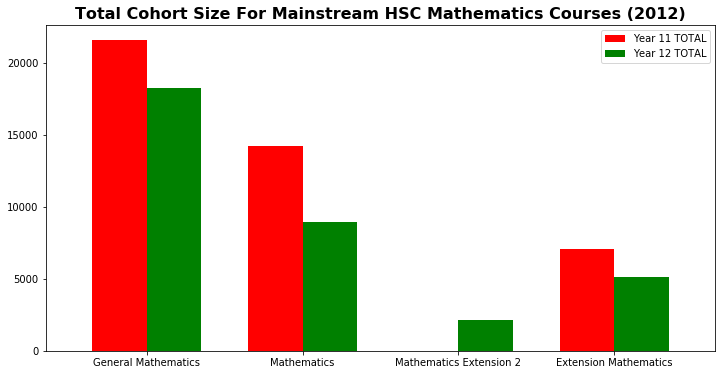

In [77]:
year_11_total = math_courses[['course_name', 'year_11_total']]
year_12_total = math_courses[['course_name', 'year_12_total']]

fig, ax = plt.subplots(figsize=(12,6))
width = 0.35
ind = np.arange(4)
ax.bar(ind + (width/2), year_11_total['year_11_total'], width=width, label='Year 11 TOTAL', color='red')
ax.bar(ind + (width + width/2), year_12_total['year_12_total'], width=width, label='Year 12 TOTAL', color='green')
ax.set(xticks=ind + width, xticklabels=math_courses.course_name, xlim=[2*width - 1, len(math_courses)])
plt.title("Total Cohort Size For Mainstream HSC Mathematics Courses (2012)", fontsize=16, fontweight='bold')
plt.legend()
plt.show()

From the above graphs, we can see that the number of males students doing mathematics (2U), Extension 1 and Extension 2 are higher than the number of females doing those courses. The only exception, consistent in the Year 11 and Year 12 cohort sizes is a larger proportion of female students opting for the general mathematics course (a non-calculus based course).

Let's see if this trend is consistent with the sciences such as physics, chemistry and biology.

In [78]:
regex = 'Mathematics'
science_courses = df_temp_stem[~df_temp_stem['course_name'].str.contains(regex)].reset_index(drop=True)

In [79]:
science_courses

,course_name,units,year_11_male,year_11_female,year_11_total,year_12_male,year_12_female,year_12_total
0,Biology,2,5018.0,8218.0,13236.0,3545.0,5882.0,9427.0
1,Chemistry,2,4996.0,4353.0,9349.0,3585.0,2884.0,6469.0
2,Physics,2,5843.0,1857.0,7700.0,4354.0,1258.0,5612.0


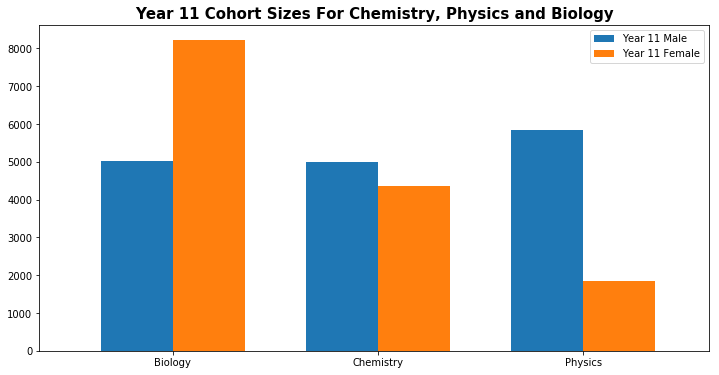

In [80]:
num_course = len(science_courses['course_name'])
ind = np.arange(num_course)
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ind + width/2, science_courses['year_11_male'], width=width, label="Year 11 Male")
ax.bar(ind + (width + width/2), science_courses['year_11_female'], width=width, label="Year 11 Female")
ax.set(xticks=ind + width, xticklabels=science_courses.course_name, xlim=[2*width - 1, len(math_courses)/1.35])
plt.legend()
plt.title("Year 11 Cohort Sizes For Chemistry, Physics and Biology", fontweight='bold', fontsize=15)
plt.show()

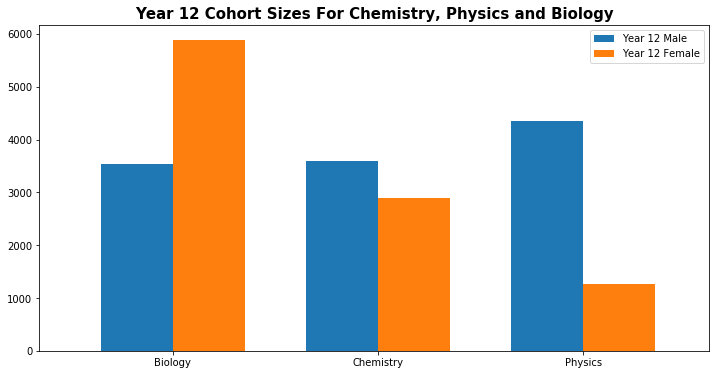

In [81]:
num_course = len(science_courses['course_name'])
ind = np.arange(num_course)
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ind + width/2, science_courses['year_12_male'], width=width, label="Year 12 Male")
ax.bar(ind + (width + width/2), science_courses['year_12_female'], width=width, label="Year 12 Female")
ax.set(xticks=ind + width, xticklabels=science_courses.course_name, xlim=[2*width - 1, len(math_courses)/1.35])
plt.legend()
plt.title("Year 12 Cohort Sizes For Chemistry, Physics and Biology", fontweight='bold', fontsize=15)
plt.show()

For both the Year 11 and Year 12 cohort, we can see that the sciences are male dominant with the exception of biology where the number of female students taking biology is significantly greater than that of male students doing the course. With Physics, we have the opposite trend occuring where the subject is significantly male dominated. However, the total number of students doing physics is considerably less than that of biology and chemistry. With chemistry, while there are still more male students doing the course, the number of female students taking chemistry is relatively the same to the number of male students.

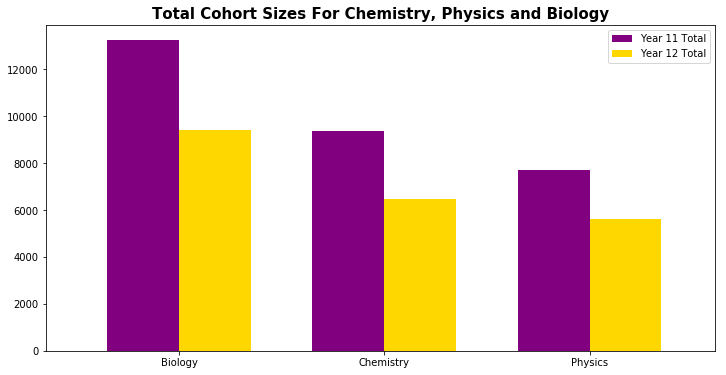

In [82]:
num_course = len(science_courses['course_name'])
ind = np.arange(num_course)
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ind + width/2, science_courses['year_11_total'], width=width, label="Year 11 Total", color='purple')
ax.bar(ind + (width + width/2), science_courses['year_12_total'], width=width, label="Year 12 Total", color='gold')
ax.set(xticks=ind + width, xticklabels=science_courses.course_name, xlim=[2*width - 1, len(math_courses)/1.35])
plt.legend()
plt.title("Total Cohort Sizes For Chemistry, Physics and Biology", fontweight='bold', fontsize=15)
plt.show()

<h2>Variations In Cohort Sizes For STEM Subjects From 2012 to 2017</h2>

In [83]:
enrol_datasets

['2012_y11_and_12_enrol.csv',
 '2013_y11_and_12_enrol.csv',
 '2014_y11_and_12_enrol.csv',
 '2015_y11_and_12_enrol.csv',
 '2016_y11_and_12_enrol.csv',
 '2017_y11_and_12_enrol.csv']

In [84]:
tmp_df = pd.read_csv(enrol_datasets[0])
tmp_df = tmp_df.drop('Unnamed: 8', axis=1)


In [85]:
tmp_df['year'] = enrol_datasets[0][0:4]

In [86]:
tmp_df.head()

,course_name,units,year_11_male,year_11_female,year_11_total,year_12 _male,year_12 _female,year_12 _total,year
0,Aboriginal Studies,2,170.0,347.0,517.0,93.0,227.0,320.0,2012
1,Aboriginal Studies Life Skills,2,28.0,15.0,43.0,NaN,NaN,NaN,2012
2,Aged Care Specialisation Study,1,NaN,NaN,NaN,4.0,16.0,20.0,2012
3,Agriculture,2,784.0,677.0,1461.0,444.0,544.0,988.0,2012
4,Agriculture Life Skills,2,30.0,13.0,43.0,23.0,9.0,32.0,2012


In [87]:
list_df = []
for dataset in enrol_datasets:
    tmp_set = pd.read_csv(dataset, encoding = "ISO-8859-1", thousands=",")
    if "Unnamed: 8" in tmp_set.columns:
        tmp_set = tmp_set.drop('Unnamed: 8', axis=1)
    tmp_set['year'] = dataset[0:4]
    list_df.append(tmp_set)

In [88]:
# We want to concatenate each dataframe in list_df on top of each other (per row basis, axis=0). 

# Make the base Dataframe list_df[0]
df = list_df[0]

# Now concatenate all dataframes on top of each other:
for i in range(1,6):
    df = pd.concat([df, list_df[i]], axis=0)
    
# Make sure there are no whitespaces in the column names of the dataframe, df:
curr_cols = df.columns
new_cols = []
for col in df.columns:
    new_col = col.replace(" ", "")
    new_cols.append(new_col)

# Assign new column names to the current dataframe:
df.columns = new_cols

In [89]:
# We now want to isolate only the STEM subjects we analysed earlier for the 2012 subset.
boolean_mask = df['course_name'].str.contains("Mathematics|Chemistry|Physics|Biology")
df_stem = df[boolean_mask == True].fillna(0)

In [90]:
# We'll start the analysis with the sciences since the course names are easier to filter with no need for further work
df_sciences = df_stem[df_stem['course_name'].str.contains("Chemistry|Physics|Biology")]

<h2>Fluctuations In Cohort Size For HSC Biology</h2>

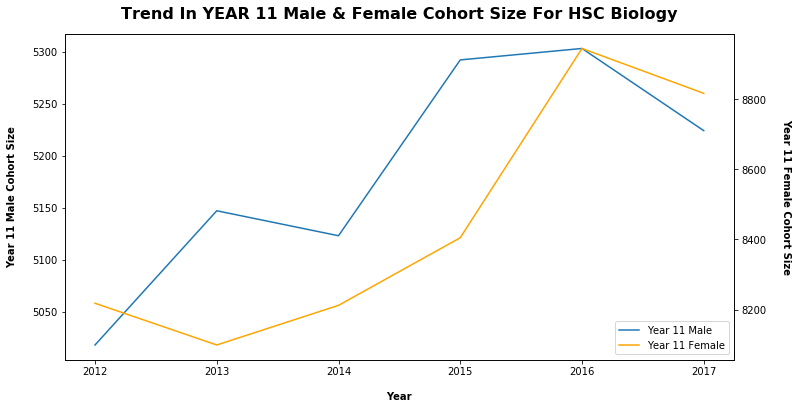

In [108]:
# Filtering The Biology courses, we want see how the male, female and total cohort size has fluctuated from 2012-2017
df_biology = df_sciences[df_sciences['course_name'] == 'Biology']

# Create a figure to plot all the trends:
fig, ax1 = plt.subplots(figsize=(12,6))
plt1 = ax1.plot(df_biology['year'], df_biology['year_11_male'], label='Year 11 Male')
ax1.set_ylabel("Year 11 Male Cohort Size", labelpad=15, fontweight='bold')
ax1.set_xlabel("Year", labelpad=15, fontweight='bold')
ax2 = ax1.twinx()
plt2 = ax2.plot(df_biology['year'], df_biology['year_11_female'], label='Year 11 Female', color='orange')
ax2.set_ylabel("Year 11 Female Cohort Size", rotation=270, labelpad=25, fontweight='bold')

plt.title("Trend In YEAR 11 Male & Female Cohort Size For HSC Biology", fontsize=16, fontweight='bold', pad=15)

fig.legend(loc='upper right', bbox_to_anchor=(0.850, 0.215))

plt.show()

The above graph shows a clear increase in the number of students undertaking the Biology course for the HSC in Year 11. We can make a preliminary conclusion that this is due to the nature of the subject lacking any quantitative analysis that may involve mathematical computation or theoretical understanding via mathematics. There is a drop for the male and female candidature from 2016-2017 but not by a significant amount. 

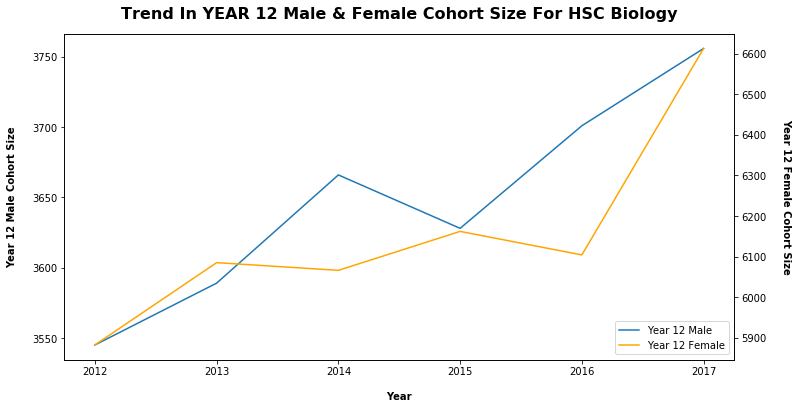

In [109]:
# Filtering The Biology courses, we want see how the male, female and total cohort size has fluctuated from 2012-2017
df_biology = df_sciences[df_sciences['course_name'] == 'Biology']

# Create a figure to plot all the trends:
fig, ax1 = plt.subplots(figsize=(12,6))
plt1 = ax1.plot(df_biology['year'], df_biology['year_12_male'], label='Year 12 Male')
ax1.set_ylabel("Year 12 Male Cohort Size", labelpad=15, fontweight='bold')
ax1.set_xlabel("Year", labelpad=15, fontweight='bold')
ax2 = ax1.twinx()
plt2 = ax2.plot(df_biology['year'], df_biology['year_12_female'], label='Year 12 Female', color='orange')
ax2.set_ylabel("Year 12 Female Cohort Size", rotation=270, labelpad=25, fontweight='bold')

plt.title("Trend In YEAR 12 Male & Female Cohort Size For HSC Biology", fontsize=16, fontweight='bold', pad=15)

fig.legend(loc='upper right', bbox_to_anchor=(0.850, 0.215))

plt.show()

In [133]:
# Compute largest increase based off of graph:
m_inc = float(df_biology[df_biology['year'].str.contains('2017')]['year_12_male']) - float(df_biology[df_biology['year'].str.contains('2015')]['year_12_male'])
f_inc = float(df_biology[df_biology['year'].str.contains('2017')]['year_12_female']) - float(df_biology[df_biology['year'].str.contains('2016')]['year_12_female'])

# Print out:
print("Male cohort increase from 2015 to 2017 = {}".format(m_inc))
print("Female cohort increase from 2015 to 2017 = {}".format(f_inc))

Male cohort increase from 2015 to 2017 = 128.0
Female cohort increase from 2015 to 2017 = 509.0


The trend remains consistent for that of the Year 12 candidature for HSC biology where we can see a sharp increase in the candidature numbers for males and females between 2015 and 2016. For males, this increaase is clear from 2015 to 2017 while for the female candidature, the increase is clearly prominent from 2016 to 2017. This increase is calculated and shown above. Overall, we can see the overall cohort size is larger for females than males where the peak cohort size for females was 6600 students VS the peak cohort size for males which was 3750 students.

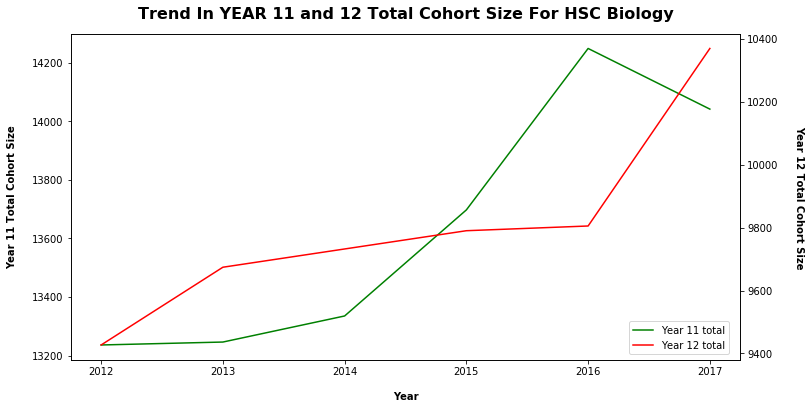

In [114]:
# Filtering The Biology courses, we want see how the total, total and total cohort size has fluctuated from 2012-2017
df_biology = df_sciences[df_sciences['course_name'] == 'Biology']

# Create a figure to plot all the trends:
fig, ax1 = plt.subplots(figsize=(12,6))
plt1 = ax1.plot(df_biology['year'], df_biology['year_11_total'], label='Year 11 total', color='green')
ax1.set_ylabel("Year 11 Total Cohort Size", labelpad=15, fontweight='bold')
ax1.set_xlabel("Year", labelpad=15, fontweight='bold')
ax2 = ax1.twinx()
plt2 = ax2.plot(df_biology['year'], df_biology['year_12_total'], label='Year 12 total', color='red')
ax2.set_ylabel("Year 12 Total Cohort Size", rotation=270, labelpad=25, fontweight='bold')

plt.title("Trend In YEAR 11 and 12 Total Cohort Size For HSC Biology", fontsize=16, fontweight='bold', pad=15)

fig.legend(loc='upper right', bbox_to_anchor=(0.850, 0.215))

plt.show()

<h2>Fluctuations In Cohort Size For HSC Chemistry</h2>

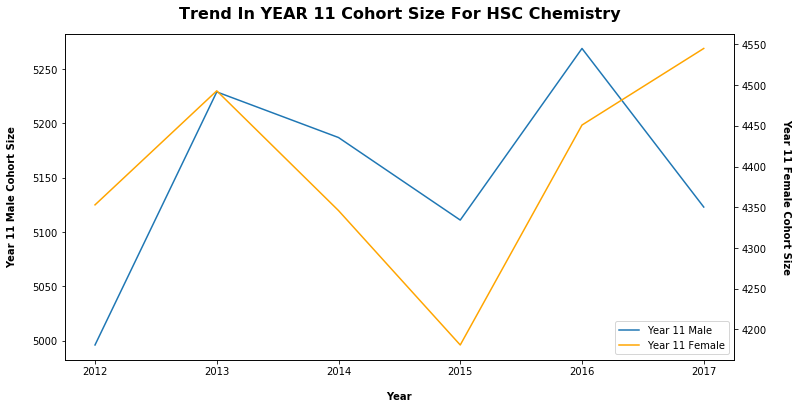

In [116]:
# Filtering The Chemistry courses, we want see how the male, female and total cohort size has fluctuated from 2012-2017
df_chem = df_sciences[df_sciences['course_name'] == 'Chemistry']

# Create a figure to plot all the trends:
fig, ax1 = plt.subplots(figsize=(12,6))
plt1 = ax1.plot(df_chem['year'], df_chem['year_11_male'], label='Year 11 Male')
ax1.set_ylabel("Year 11 Male Cohort Size", labelpad=15, fontweight='bold')
ax1.set_xlabel("Year", labelpad=15, fontweight='bold')
ax2 = ax1.twinx()
plt2 = ax2.plot(df_chem['year'], df_chem['year_11_female'], label='Year 11 Female', color='orange')
ax2.set_ylabel("Year 11 Female Cohort Size", rotation=270, labelpad=25, fontweight='bold')

plt.title("Trend In YEAR 11 Cohort Size For HSC Chemistry", fontsize=16, fontweight='bold', pad=15)

fig.legend(loc='upper right', bbox_to_anchor=(0.850, 0.215))

plt.show()

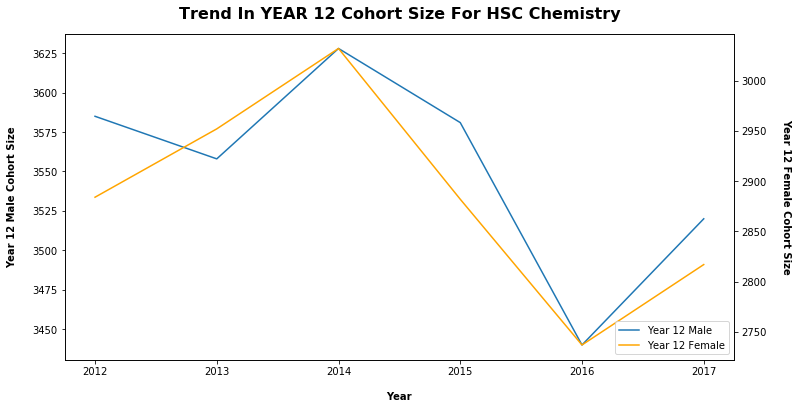

In [117]:
# Filtering The Chemistry courses, we want see how the male, female and total cohort size has fluctuated from 2012-2017
df_chem = df_sciences[df_sciences['course_name'] == 'Chemistry']

# Create a figure to plot all the trends:
fig, ax1 = plt.subplots(figsize=(12,6))
plt1 = ax1.plot(df_chem['year'], df_chem['year_12_male'], label='Year 12 Male')
ax1.set_ylabel("Year 12 Male Cohort Size", labelpad=15, fontweight='bold')
ax1.set_xlabel("Year", labelpad=15, fontweight='bold')
ax2 = ax1.twinx()
plt2 = ax2.plot(df_chem['year'], df_chem['year_12_female'], label='Year 12 Female', color='orange')
ax2.set_ylabel("Year 12 Female Cohort Size", rotation=270, labelpad=25, fontweight='bold')

plt.title("Trend In YEAR 12 Cohort Size For HSC Chemistry", fontsize=16, fontweight='bold', pad=15)

fig.legend(loc='upper right', bbox_to_anchor=(0.850, 0.215))

plt.show()

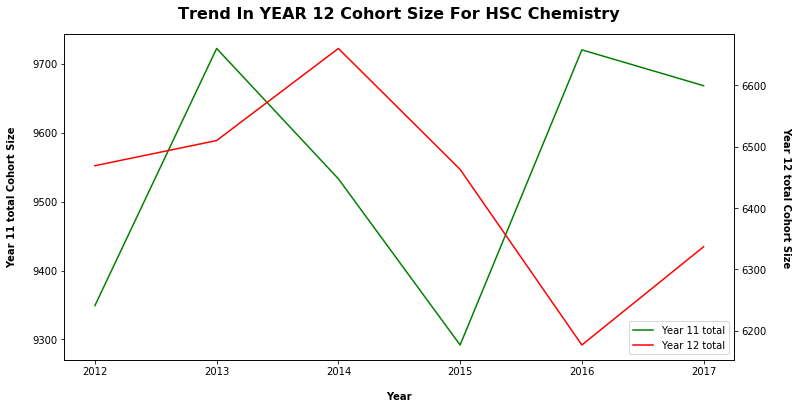

In [118]:
# Filtering The Chemistry courses, we want see how the total, total and total cohort size has fluctuated from 2012-2017
df_chem = df_sciences[df_sciences['course_name'] == 'Chemistry']

# Create a figure to plot all the trends:
fig, ax1 = plt.subplots(figsize=(12,6))
plt1 = ax1.plot(df_chem['year'], df_chem['year_11_total'], label='Year 11 total', color='green')
ax1.set_ylabel("Year 11 total Cohort Size", labelpad=15, fontweight='bold')
ax1.set_xlabel("Year", labelpad=15, fontweight='bold')
ax2 = ax1.twinx()
plt2 = ax2.plot(df_chem['year'], df_chem['year_12_total'], label='Year 12 total', color='red')
ax2.set_ylabel("Year 12 total Cohort Size", rotation=270, labelpad=25, fontweight='bold')

plt.title("Trend In YEAR 12 Cohort Size For HSC Chemistry", fontsize=16, fontweight='bold', pad=15)

fig.legend(loc='upper right', bbox_to_anchor=(0.850, 0.215))

plt.show()

<h2>Fluctuations In Cohort Size For HSC Physics</h2>

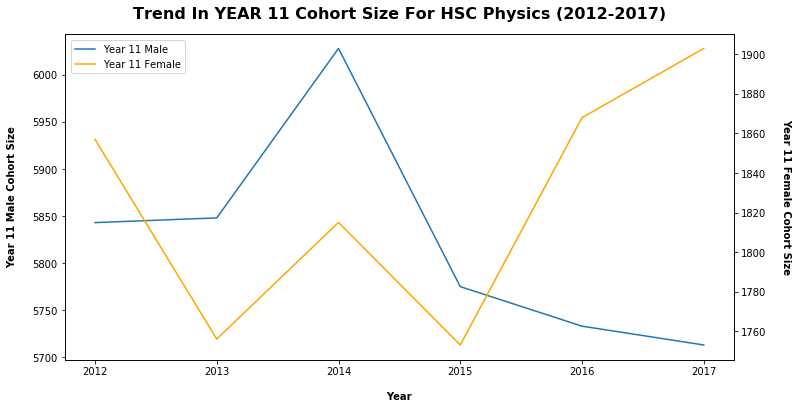

In [106]:
# Filtering The Physics courses, we want see how the male, female and total cohort size has fluctuated from 2012-2017
df_phys = df_sciences[df_sciences['course_name'] == 'Physics']

# Create a figure to plot all the trends:
fig, ax1 = plt.subplots(figsize=(12,6))
plt1 = ax1.plot(df_phys['year'], df_phys['year_11_male'], label='Year 11 Male')
ax1.set_ylabel("Year 11 Male Cohort Size", labelpad=15, fontweight='bold')
ax1.set_xlabel("Year", labelpad=15, fontweight='bold')
ax2 = ax1.twinx()
plt2 = ax2.plot(df_phys['year'], df_phys['year_11_female'], label='Year 11 Female', color='orange')
ax2.set_ylabel("Year 11 Female Cohort Size", rotation=270, labelpad=25, fontweight='bold')

plt.title("Trend In YEAR 11 Cohort Size For HSC Physics (2012-2017)", fontsize=16, fontweight='bold', pad=15)

fig.legend(loc='upper right', bbox_to_anchor=(0.220, 0.865))

plt.show()

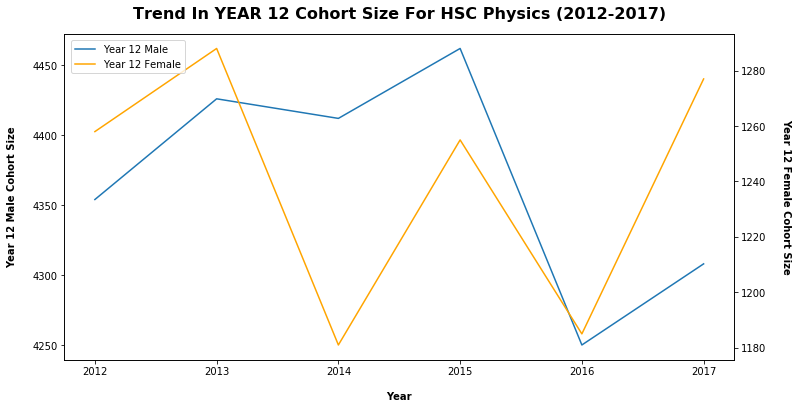

In [105]:
# Filtering The Physics courses, we want see how the male, female and total cohort size has fluctuated from 2012-2017
df_phys = df_sciences[df_sciences['course_name'] == 'Physics']

# Create a figure to plot all the trends:
fig, ax1 = plt.subplots(figsize=(12,6))
plt1 = ax1.plot(df_phys['year'], df_phys['year_12_male'], label='Year 12 Male')
ax1.set_ylabel("Year 12 Male Cohort Size", labelpad=15, fontweight='bold')
ax1.set_xlabel("Year", labelpad=15, fontweight='bold')
ax2 = ax1.twinx()
plt2 = ax2.plot(df_phys['year'], df_phys['year_12_female'], label='Year 12 Female', color='orange')
ax2.set_ylabel("Year 12 Female Cohort Size", rotation=270, labelpad=25, fontweight='bold')

plt.title("Trend In YEAR 12 Cohort Size For HSC Physics (2012-2017)", fontsize=16, fontweight='bold', pad=15)

fig.legend(loc='upper right', bbox_to_anchor=(0.220, 0.865))

plt.show()

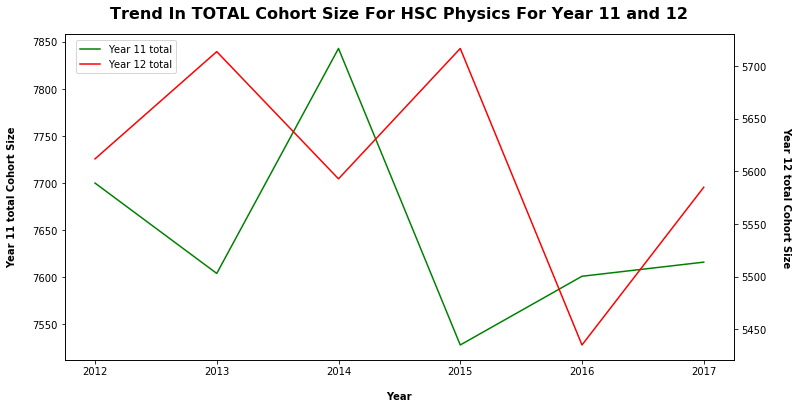

In [121]:
# Filtering The Physics courses, we want see how the total, total and total cohort size has fluctuated from 2012-2017
df_phys = df_sciences[df_sciences['course_name'] == 'Physics']

# Create a figure to plot all the trends:
fig, ax1 = plt.subplots(figsize=(12,6))
plt1 = ax1.plot(df_phys['year'], df_phys['year_11_total'], label='Year 11 total', color='green')
ax1.set_ylabel("Year 11 total Cohort Size", labelpad=15, fontweight='bold')
ax1.set_xlabel("Year", labelpad=15, fontweight='bold')
ax2 = ax1.twinx()
plt2 = ax2.plot(df_phys['year'], df_phys['year_12_total'], label='Year 12 total', color='red')
ax2.set_ylabel("Year 12 total Cohort Size", rotation=270, labelpad=25, fontweight='bold')

plt.title("Trend In TOTAL Cohort Size For HSC Physics For Year 11 and 12", fontsize=16, fontweight='bold', pad=15)

fig.legend(loc='upper right', bbox_to_anchor=(0.210, 0.865))

plt.show()

<h2>Fluctuations In Year 11 and Year 12 Cohort Sizes For Mathematics Courses</h2>

We can do the same thing for the mathematics courses. Note that like before, we'll have to clean up the <i>Mathematics Extension 1</i> course data due to their duplication in the dataset where, again, <i>Mathematics Extension</i> represents the relevant cohort in Year 11 while <i>Mathematics Extension 1</i> represents the cohort in Year 12.

In [94]:
# Extracting all math courses from the stem set:
df_math = df_stem[df_stem['course_name'].str.contains("Mathematics")].reset_index(drop=True)
df_math.head()

,course_name,units,year_11_male,year_11_female,year_11_total,year_12_male,year_12_female,year_12_total,year
0,General Mathematics,2.0,10528.0,11043.0,21571.0,8942.0,9303.0,18245.0,2012
1,Mathematics,2.0,7647.0,6591.0,14238.0,4816.0,4152.0,8968.0,2012
2,Mathematics Extension,1.0,3967.0,3110.0,7077.0,0.0,0.0,0.0,2012
3,Mathematics Extension 1,2.0,0.0,0.0,0.0,2985.0,2153.0,5138.0,2012
4,Mathematics Extension 2,2.0,0.0,0.0,0.0,1310.0,812.0,2122.0,2012


In [95]:
df_math_2u = df_math[df_math['course_name'].str.contains("Mathematics") & ~df_math['course_name'].str.contains("Extension|General|Life|Skills")]
df_math_2u

,course_name,units,year_11_male,year_11_female,year_11_total,year_12_male,year_12_female,year_12_total,year
1,Mathematics,2.0,7647.0,6591.0,14238.0,4816.0,4152.0,8968.0,2012
7,Mathematics,2.0,7381.0,6259.0,13640.0,4748.0,4206.0,8954.0,2013
13,Mathematics,2.0,7288.0,6153.0,13441.0,4687.0,4164.0,8851.0,2014
20,Mathematics,2.0,7048.0,6066.0,13114.0,4683.0,4086.0,8769.0,2015
27,Mathematics,2.0,7356.0,6228.0,13584.0,4379.0,3981.0,8360.0,2016
34,Mathematics,2.0,7412.0,6557.0,13969.0,4707.0,4137.0,8844.0,2017


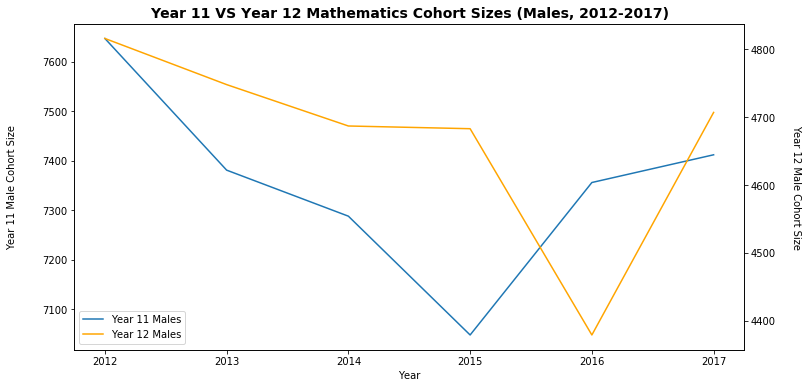

In [96]:
fig, ax1 = plt.subplots(figsize=(12,6))
l1 = ax1.plot(df_math_2u['year'], df_math_2u['year_11_male'], label='Year 11 Males')
ax1.set_ylabel("Year 11 Male Cohort Size", labelpad=25)
ax1.set_xlabel("Year")

ax2 = ax1.twinx()
l2 = ax2.plot(df_math_2u['year'], df_math_2u['year_12_male'], label='Year 12 Males', color='orange')
ax2.set_ylabel("Year 12 Male Cohort Size", labelpad=25, rotation=270)

plt.title("Year 11 VS Year 12 Mathematics Cohort Sizes (Males, 2012-2017)", fontsize=14, fontweight='bold')
fig.legend(loc='upper right', bbox_to_anchor=(0.220, 0.190))
plt.show()

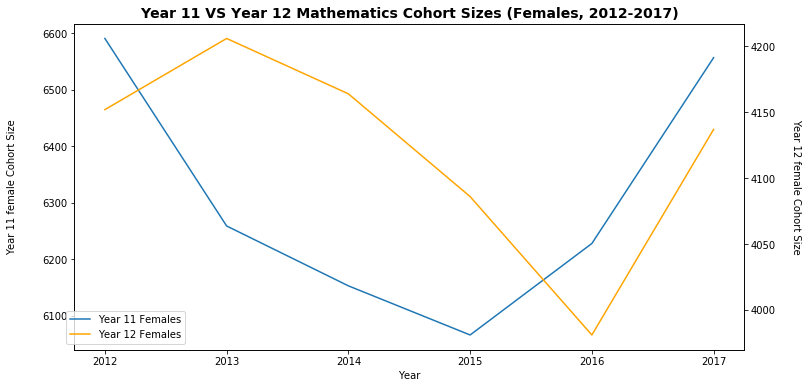

In [97]:
fig, ax1 = plt.subplots(figsize=(12,6))
l1 = ax1.plot(df_math_2u['year'], df_math_2u['year_11_female'], label='Year 11 Females')
ax1.set_ylabel("Year 11 female Cohort Size", labelpad=25)
ax1.set_xlabel("Year")

ax2 = ax1.twinx()
l2 = ax2.plot(df_math_2u['year'], df_math_2u['year_12_female'], label='Year 12 Females', color='orange')
ax2.set_ylabel("Year 12 female Cohort Size", labelpad=25, rotation=270)

plt.title("Year 11 VS Year 12 Mathematics Cohort Sizes (Females, 2012-2017)", fontsize=14, fontweight='bold')
fig.legend(loc='upper right', bbox_to_anchor=(0.220, 0.190))
plt.show()

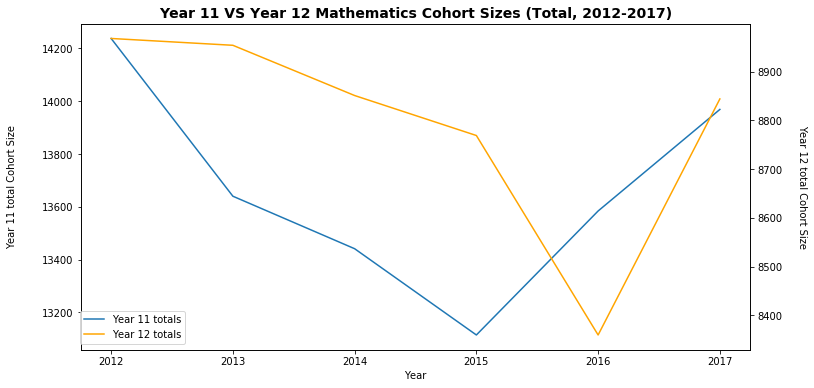

In [98]:
fig, ax1 = plt.subplots(figsize=(12,6))
l1 = ax1.plot(df_math_2u['year'], df_math_2u['year_11_total'], label='Year 11 totals')
ax1.set_ylabel("Year 11 total Cohort Size", labelpad=25)
ax1.set_xlabel("Year")

ax2 = ax1.twinx()
l2 = ax2.plot(df_math_2u['year'], df_math_2u['year_12_total'], label='Year 12 totals', color='orange')
ax2.set_ylabel("Year 12 total Cohort Size", labelpad=25, rotation=270)

plt.title("Year 11 VS Year 12 Mathematics Cohort Sizes (Total, 2012-2017)", fontsize=14, fontweight='bold')
fig.legend(loc='upper right', bbox_to_anchor=(0.220, 0.190))
plt.show()

In [99]:
# From the math subset, extract the data associated with Mathematics Extension 1
df_math_ext = df_math[df_math['course_name'].str.contains("Extension") & ~df_math['course_name'].str.contains("2")].reset_index(drop=True)
df_math_ext

,course_name,units,year_11_male,year_11_female,year_11_total,year_12_male,year_12_female,year_12_total,year
0,Mathematics Extension,1.0,3967.0,3110.0,7077.0,0.0,0.0,0.0,2012
1,Mathematics Extension 1,2.0,0.0,0.0,0.0,2985.0,2153.0,5138.0,2012
2,Mathematics Extension,1.0,4006.0,3025.0,7031.0,0.0,0.0,0.0,2013
3,Mathematics Extension 1,2.0,0.0,0.0,0.0,2925.0,2176.0,5101.0,2013
4,Mathematics Extension,1.0,3894.0,3011.0,6905.0,0.0,0.0,0.0,2014
5,Mathematics Extension 1,2.0,0.0,0.0,0.0,3024.0,2159.0,5183.0,2014
6,Mathematics Extension,1.0,3744.0,2972.0,6716.0,0.0,0.0,0.0,2015
7,Mathematics Extension 1,2.0,0.0,0.0,0.0,2950.0,2209.0,5159.0,2015
8,Mathematics Extension,1.0,3871.0,2896.0,6767.0,0.0,0.0,0.0,2016
9,Mathematics Extension 1,2.0,0.0,0.0,0.0,2820.0,2108.0,4928.0,2016


In [100]:
# Scroll through the years and if consecutive rows are equal, sum all columns from 'year_11_male' to 'year_12_total'
# i.e. columns 2-7. 
i = 0

while i < 12:
    
    # Pull out the odd row:
    row1 = df_math_ext.iloc[i, :]
    
    # Pull out the even row:
    row2 = df_math_ext.iloc[i+1, :]
    
    # Create 'new_row' that is the sum of row1 and row2
    new_row = row1.copy()
    new_row = row1 + row2
    
    # Convert new_row back to a DataFrame and Transpose new_row so same dimension with dataframe:
    new_row = new_row.to_frame().T
    
    # Make a few adjustments to the data after summation:
    new_row['course_name'] = "Mathematics Extension"
    new_row['year'] = row1['year']
        
    # Append this row onto the current 'df_math_ext' dataframe. We'll delete the old entries later:
    df_math_ext = pd.concat([df_math_ext, new_row], axis=0)
    
    # Iterate i such that we are in the next two rows. No overlap.
    i = i + 2

df_math_ext = df_math_ext.reset_index(drop=True).iloc[len(df_math_ext)-6: len(df_math_ext), :].reset_index(drop=True)

In [101]:
df_math_ext

,course_name,units,year_11_male,year_11_female,year_11_total,year_12_male,year_12_female,year_12_total,year
0,Mathematics Extension,3,3967,3110,7077,2985,2153,5138,2012
1,Mathematics Extension,3,4006,3025,7031,2925,2176,5101,2013
2,Mathematics Extension,3,3894,3011,6905,3024,2159,5183,2014
3,Mathematics Extension,3,3744,2972,6716,2950,2209,5159,2015
4,Mathematics Extension,3,3871,2896,6767,2820,2108,4928,2016
5,Mathematics Extension,3,3810,3057,6867,2913,1998,4911,2017


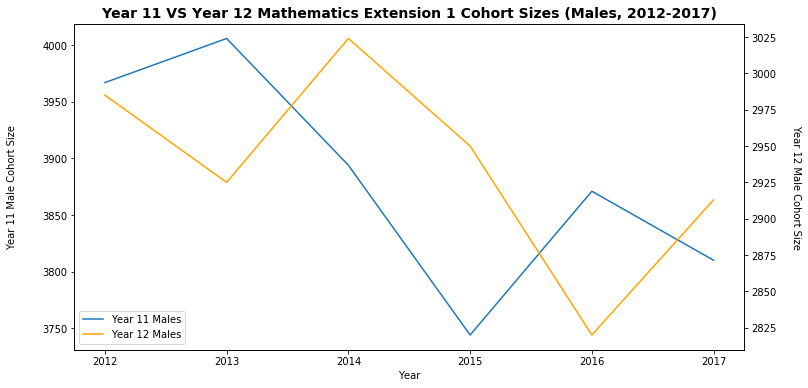

In [102]:
fig, ax1 = plt.subplots(figsize=(12,6))
l1 = ax1.plot(df_math_ext['year'], df_math_ext['year_11_male'], label='Year 11 Males')
ax1.set_ylabel("Year 11 Male Cohort Size", labelpad=25)
ax1.set_xlabel("Year")

ax2 = ax1.twinx()
l2 = ax2.plot(df_math_ext['year'], df_math_ext['year_12_male'], label='Year 12 Males', color='orange')
ax2.set_ylabel("Year 12 Male Cohort Size", labelpad=25, rotation=270)

plt.title("Year 11 VS Year 12 Mathematics Extension 1 Cohort Sizes (Males, 2012-2017)", fontsize=14, fontweight='bold')
fig.legend(loc='upper right', bbox_to_anchor=(0.220, 0.190))
plt.show()

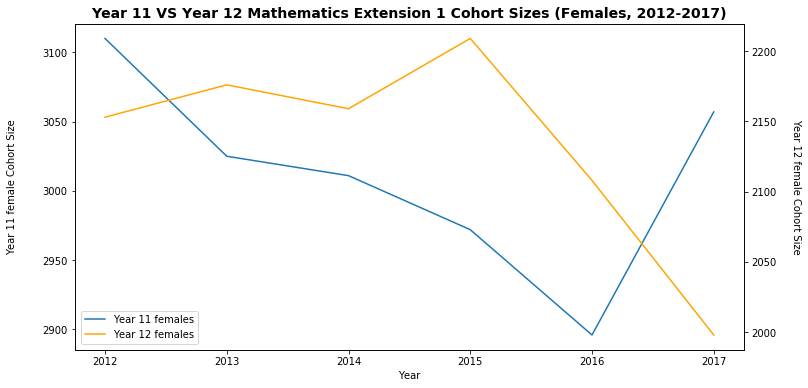

In [103]:
fig, ax1 = plt.subplots(figsize=(12,6))
l1 = ax1.plot(df_math_ext['year'], df_math_ext['year_11_female'], label='Year 11 females')
ax1.set_ylabel("Year 11 female Cohort Size", labelpad=25)
ax1.set_xlabel("Year")

ax2 = ax1.twinx()
l2 = ax2.plot(df_math_ext['year'], df_math_ext['year_12_female'], label='Year 12 females', color='orange')
ax2.set_ylabel("Year 12 female Cohort Size", labelpad=25, rotation=270)

plt.title("Year 11 VS Year 12 Mathematics Extension 1 Cohort Sizes (Females, 2012-2017)", fontsize=14, fontweight='bold')
fig.legend(loc='upper right', bbox_to_anchor=(0.235, 0.190))
plt.show()